## Imports and Convolution Function


In [87]:
import matplotlib.pyplot as plt
import numpy as np
import cv2



def convolve(image, kernel):
    height, width, depth = image.shape
    kernel_size = kernel.shape[0] # kernel is square

    pad_size = kernel_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (pad_size, pad_size)), mode='edge')
    result = np.zeros((height, width, depth))

    for y in range(height):
        for x in range(width):
            for d in range(depth):
                mat = padded_image[y:y+kernel_size, x:x+kernel_size, d]
                result[y, x, d] = np.sum(np.multiply(mat, kernel))

    return result.astype(np.uint8)

    


## Read in Images 

In [88]:
#Gaussian Blur

cheetah = cv2.imread('./cheetah.png')
elephant = cv2.imread('./elephant.png')
cheetah = cv2.cvtColor(cheetah, cv2.COLOR_BGR2RGB)
elephant = cv2.cvtColor(elephant, cv2.COLOR_BGR2RGB)

## Calculate high and low pass filters

In [89]:
gaussian_est_kernel = 1/16 * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])


low_pass_elephant = convolve(elephant, gaussian_est_kernel)
high_pass_elephant = (elephant - low_pass_elephant) 

low_pass_cheetah = convolve(cheetah, gaussian_est_kernel)
high_pass_cheetah = (cheetah - low_pass_cheetah) 


## Create Hybrid Images

In [90]:

# Combine the low-pass and high-pass components with weighting
hybrid_image_1 = np.clip((low_pass_cheetah) + (high_pass_elephant), 0, 255).astype(np.uint8)
hybrid_image_2 = np.clip((low_pass_elephant * 0.75) + (high_pass_cheetah * 0.25), 0, 255).astype(np.uint8)


## Display Images

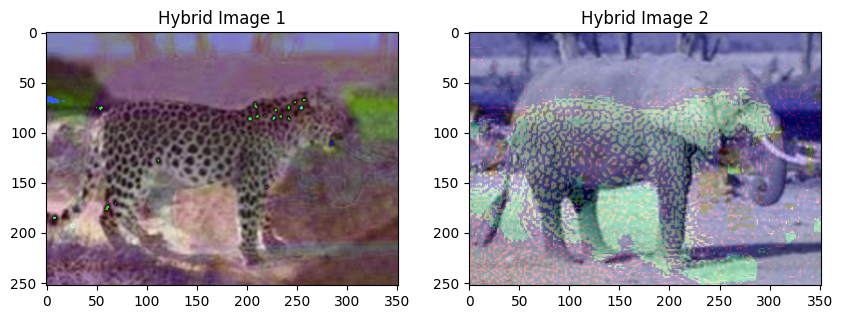

In [91]:
# Display the hybrid images using Matplotlib
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(hybrid_image_1)
ax[0].set_title('Hybrid Image 1')
ax[1].imshow(hybrid_image_2)
ax[1].set_title('Hybrid Image 2')
plt.show()